In [1]:
import pandas
import helpers
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Подход 2: логистическая регрессия

In [2]:
X, y, X_kaggle = helpers.get_clean_data()
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(y.size, n_folds=5, shuffle=True, random_state=42)

# Подбираем оптимальный параметр регуляризации (C)

In [3]:
def plot_C_scores(C_pow_range, scores):
    plt.plot(C_pow_range, scores)
    plt.xlabel('log(C)')
    plt.ylabel('score')
    plt.show()

def test_model_C(X, y, C):
    print 'C =', str(C)
    model = LogisticRegression(C=C, random_state=42, n_jobs=-1)
    return cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    
def test_model(X, y):
    scores = []
    C_pow_range = range(-5, 6)
    C_range = [10.0 ** i for i in C_pow_range]
    for C in C_range:
        start_time = datetime.datetime.now()
        model_scores = test_model_C(X, y, C)
        print model_scores
        print 'Time elapsed:', datetime.datetime.now() - start_time       
        scores.append(np.mean(model_scores))

    plot_C_scores(C_pow_range, scores)
    
    max_score = max(scores)
    max_score_index = scores.index(max_score)
    return C_range[max_score_index], max_score
    

C = 1e-05
[ 0.69315319  0.69481539  0.69571378  0.6951316   0.69699446]
Time elapsed: 0:00:02.943402
C = 0.0001
[ 0.70956687  0.71039474  0.71170335  0.71176083  0.71336295]
Time elapsed: 0:00:04.427154
C = 0.001
[ 0.71449542  0.71577214  0.71625974  0.71697302  0.71831737]
Time elapsed: 0:00:08.015861
C = 0.01
[ 0.71464599  0.71617915  0.71624749  0.71735041  0.71832832]
Time elapsed: 0:00:10.132491
C = 0.1
[ 0.71462192  0.7161748   0.71619187  0.71737597  0.7182712 ]
Time elapsed: 0:00:11.127989
C = 1.0
[ 0.71461815  0.71617187  0.71618338  0.71737622  0.71826341]
Time elapsed: 0:00:11.232425
C = 10.0
[ 0.71461695  0.71617179  0.71618281  0.71737669  0.7182632 ]
Time elapsed: 0:00:11.254562
C = 100.0
[ 0.71461692  0.71617206  0.7161825   0.71737655  0.71826345]
Time elapsed: 0:00:11.253753
C = 1000.0
[ 0.71461694  0.71617214  0.7161825   0.71737659  0.71826346]
Time elapsed: 0:00:11.454127
C = 10000.0
[ 0.71461693  0.71617214  0.71618252  0.7173766   0.71826345]
Time elapsed: 0:00:11

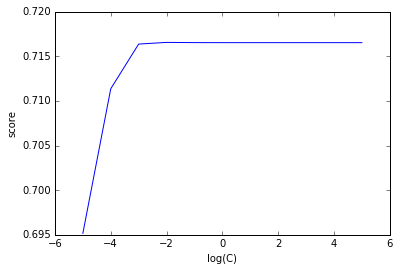

In [4]:
C, score = test_model(X, y)

In [5]:
print C
print score

0.01
0.716550270785


Наилучшее значение показателя AUC-ROC достигается при C = 0.01 и равно 0.71. Это сравнимо с градиентным бустингом по 250 деревьям, при этом логистическая регрессия работает заметно быстрее.

# Удаление категориальных признаков

In [6]:
X, y, X_kaggle = helpers.get_clean_data('clean_category')
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(y.size, n_folds=5, shuffle=True, random_state=42)

C = 1e-05
[ 0.69301062  0.69476367  0.69562224  0.69507489  0.69702951]
Time elapsed: 0:00:02.639315
C = 0.0001
[ 0.70936502  0.71042199  0.71168956  0.71168269  0.71353648]
Time elapsed: 0:00:04.120690
C = 0.001
[ 0.71434804  0.71581532  0.71629769  0.7168852   0.71853275]
Time elapsed: 0:00:07.330185
C = 0.01
[ 0.71450425  0.71622052  0.71627998  0.71725088  0.71854131]
Time elapsed: 0:00:09.359486
C = 0.1
[ 0.71448206  0.71620991  0.71622569  0.71726917  0.71848436]
Time elapsed: 0:00:10.342058
C = 1.0
[ 0.71447768  0.71620628  0.7162209   0.71727019  0.71847678]
Time elapsed: 0:00:10.437612
C = 10.0
[ 0.7144767   0.71620645  0.71621968  0.71727122  0.71847581]
Time elapsed: 0:00:10.446153
C = 100.0
[ 0.71447671  0.71620624  0.71621963  0.71727119  0.71847568]
Time elapsed: 0:00:10.441274
C = 1000.0
[ 0.71447667  0.71620624  0.71621966  0.71727119  0.71847569]
Time elapsed: 0:00:10.451347
C = 10000.0
[ 0.71447667  0.71620627  0.71621961  0.71727117  0.71847569]
Time elapsed: 0:00:10

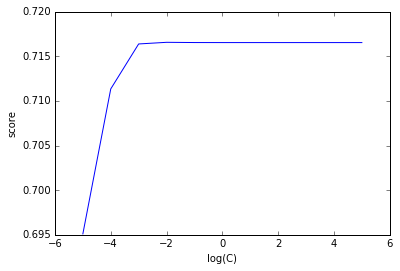

In [7]:
C, score = test_model(X, y)

In [8]:
print C
print score

0.01
0.716559386445


Удаление категориальных признаков не повлияло на качество предсказания. Наилучшее значение показателя AUC-ROC так же достигается при C = 0.01 и равно 0.71. Получается, что в предыдущей модели эти признаки никак не влияли на результат предсказания, модель смогла распознать этот шум.

# "Мешок слов" для кодирования информации о героях.

In [9]:
X, y, X_kaggle = helpers.get_clean_data('clean_category')
X_hero, _y, X_kaggle_hero = helpers.get_clean_data('hero_bag')

scaler = StandardScaler()
X = pandas.DataFrame(scaler.fit_transform(X), index = X.index)
X_kaggle = pandas.DataFrame(scaler.transform(X_kaggle), index = X_kaggle.index)

X = pandas.concat([X, X_hero], axis=1)
X_kaggle = pandas.concat([X_kaggle, X_kaggle_hero], axis=1)

kf = KFold(y.size, n_folds=5, shuffle=True, random_state=42)

C = 1e-05
[ 0.69720207  0.69884021  0.69957687  0.69934071  0.70112123]
Time elapsed: 0:00:03.872621
C = 0.0001
[ 0.72359118  0.72409681  0.72469066  0.72599494  0.72698389]
Time elapsed: 0:00:05.452274
C = 0.001
[ 0.74465332  0.74667772  0.74413152  0.74880233  0.74740586]
Time elapsed: 0:00:10.351973
C = 0.01
[ 0.74947405  0.75279102  0.7492512   0.75538896  0.7517834 ]
Time elapsed: 0:00:16.795581
C = 0.1
[ 0.74943221  0.75315638  0.74950675  0.75598201  0.75166068]
Time elapsed: 0:00:23.032549
C = 1.0
[ 0.74936266  0.75316833  0.7494975   0.75602057  0.75158709]
Time elapsed: 0:00:24.337987
C = 10.0
[ 0.74935048  0.75317089  0.74949842  0.75602516  0.75157987]
Time elapsed: 0:00:25.308090
C = 100.0
[ 0.74935007  0.75317051  0.74949888  0.75602563  0.75157887]
Time elapsed: 0:00:23.196893
C = 1000.0
[ 0.74934978  0.75317078  0.74949881  0.75602526  0.75157883]
Time elapsed: 0:00:23.431203
C = 10000.0
[ 0.74935059  0.75317032  0.74949887  0.75602545  0.75157899]
Time elapsed: 0:00:23

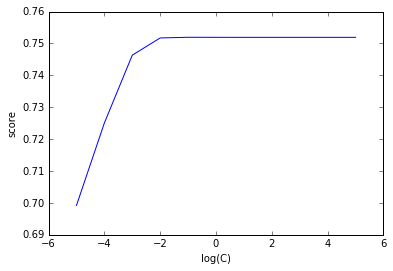

In [10]:
C, score = test_model(X, y)

In [11]:
print C
print score

0.1
0.75194760657


После добавления "мешка слов" по героям качество заметно улучшилось. Наилучшее значение показателя AUC-ROC  достигается при C = 0.1 и равно 0.75. Это объясняется тем, что вместо отсутствия данных о героях или случайного шума из id мы имеем осмысленную разреженную матрицу для построения предсказания.

# Отправляем решение на Kaggle в соревнование: Dota 2: Win Probability Prediction.

Отправим самую лучшую на данный момент модель на соревнование, и посмотрим насколько верной оказалась оценка.

In [12]:
model = LogisticRegression(C=0.1, random_state=42, n_jobs=-1)
model.fit(X, y)
helpers.kaggle_save('lg_hero_bag', model, X_kaggle)

Полученная модель получила оценку **0.75529** и позволила занять **15** место по состоянию на *Tue, 23 Feb 2016 13:49:26*